## Phase 4 Project
***

### Recommendation System For Movie-Lens

In [25]:
import pandas as pd
import seaborn as sns

In [3]:
# Define csv files to be saved into
USERS_CSV_FILE = 'users.csv'
MOVIES_CSV_FILE = 'movies.csv'
RATINGS_CSV_FILE = 'ratings.csv'

In [13]:
movies = pd.read_csv('/Users/natashawyatt/Documents/Flatiron_school/Phase_4/Phase_4_Project/ml-latest-small/movies.csv')
ratings = pd.read_csv('/Users/natashawyatt/Documents/Flatiron_school/Phase_4/Phase_4_Project/ml-latest-small/ratings.csv')
links = pd.read_csv('/Users/natashawyatt/Documents/Flatiron_school/Phase_4/Phase_4_Project/ml-latest-small/links.csv')


### Data Prep
 In the following cells we will take a look at the data to get a feel for it and see what needs to be done in terms of cleaning to prepare it for modeling.
 ***
 
 #### Movies:

In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [43]:
movies['title']

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

In [34]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [35]:
movies.value_counts()

movieId  title                                                  genres                                     
193609   Andrew Dice Clay: Dice Rules (1991)                    Comedy                                         1
4386     Cats & Dogs (2001)                                     Children|Comedy                                1
4394     Beach Blanket Bingo (1965)                             Comedy|Musical                                 1
4393     Another Woman (1988)                                   Drama                                          1
4392     Alice (1990)                                           Comedy|Drama|Fantasy|Romance                   1
                                                                                                              ..
53143    Fay Grim (2006)                                        Action|Thriller                                1
53140    Librarian: Quest for the Spear, The (2004)             Action|Adventure|Comedy|Fantasy|Roman

***
#### Ratings
***

In [20]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [22]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [62]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [40]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='movieId', ylabel='Density'>

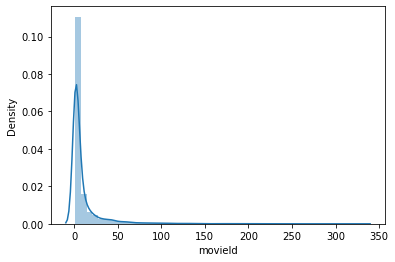

In [26]:
sns.distplot(ratings.movieId.value_counts())


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

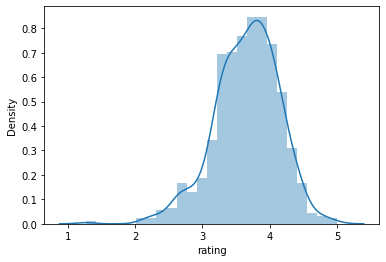

In [32]:
sns.distplot(ratings.groupby('userId')['rating'].mean())

***
#### Links
****

In [21]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [39]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [41]:
links.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

***
After looking at the README file for this data we see the difference between 'imdbID' and 'tmdbID' is that the former is an identifier for movies from IMDB and the latter is from The Movie DB. We see that there is not an equal number of values between them, so these 8 null values will need to be addressed.
***

### Data Cleaning

In [99]:
# Join all 3 files into one dataframe and take a look at the new dataframe..
dataset = pd.merge(pd.merge(movies, ratings),links, how = 'inner', on = 'movieId')
# Display 20 movies with highest ratings
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)


,title,genres,rating
56251,Eraserhead (1977),"[Drama, Horror]",5.0
33888,Chasing Amy (1997),"[Comedy, Drama, Romance]",5.0
20742,My Fair Lady (1964),"[Comedy, Drama, Musical, Romance]",5.0
10168,Forrest Gump (1994),"[Comedy, Drama, Romance, War]",5.0
10169,Forrest Gump (1994),"[Comedy, Drama, Romance, War]",5.0
65379,Gosford Park (2001),"[Comedy, Drama, Mystery]",5.0
10171,Forrest Gump (1994),"[Comedy, Drama, Romance, War]",5.0
20739,My Fair Lady (1964),"[Comedy, Drama, Musical, Romance]",5.0
10173,Forrest Gump (1994),"[Comedy, Drama, Romance, War]",5.0
10174,Forrest Gump (1994),"[Comedy, Drama, Romance, War]",5.0


In [85]:
# Looks like the 'genre' column is tab-separated, we will remove that 
dataset['genres'] = dataset['genres'].apply(lambda x: x.split('|'))

AttributeError: 'list' object has no attribute 'split'

In [76]:
dataset.head()

,movieId,title,genres,userId,rating,timestamp,imdbId,tmdbId
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703,114709,862.0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962,114709,862.0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946,114709,862.0
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970,114709,862.0
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483,114709,862.0


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
 6   imdbId     100836 non-null  int64  
 7   tmdbId     100823 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


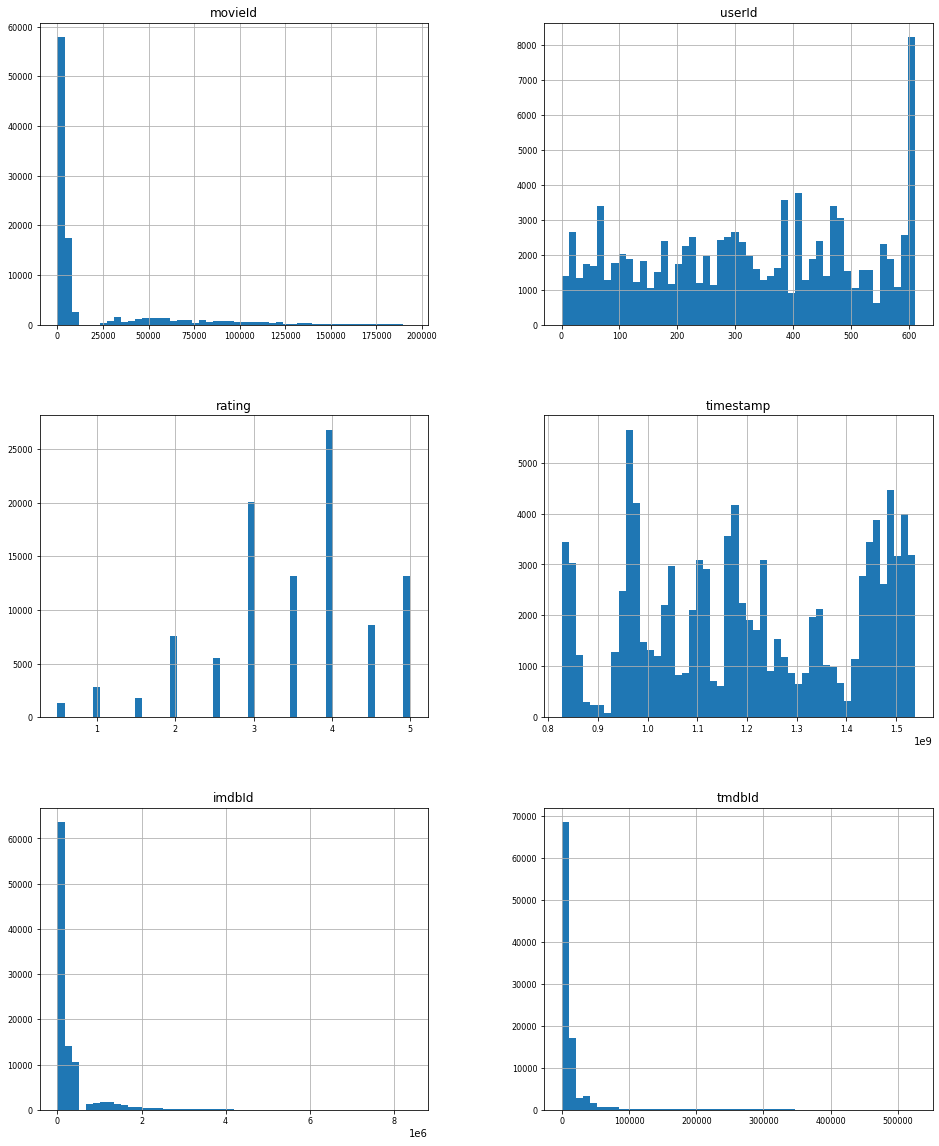

In [23]:
# Taking a quick glance at distributions...

dataset[dataset.select_dtypes(exclude = bool).columns].hist(figsize=(16, 20),
bins = 50, xlabelsize = 8, ylabelsize = 8);

In [86]:
# We want to make sure the dataframe is void of any duplicates or Nans, so we will try to look for discrepancies

print('Number of movie IDs:',dataset['movieId'].nunique())
print('**************************')
print('Number of movie Titles:',dataset['title'].nunique())
print('**************************')
print('Number of ratings:', dataset['rating'].nunique())
print('**************************')
print('Number of IMDB entries:', dataset['imdbId'].nunique())
print('**************************')
print('Number of TM entries:',dataset['tmdbId'].nunique())







Number of movie IDs: 9724
**************************
Number of movie Titles: 9719
**************************
Number of ratings: 10
**************************
Number of IMDB entries: 9724
**************************
Number of TM entries: 9715


#### Further Cleaning

We have the bones of the dataframe we will use for our models, but it still needs some work. Certain columns do not have any signifigance so they will be dropped. Others need to be encoded to numerical values for modeling. 
After some tinkering around I will now begin to work with a dataset that contains the unique user ID and corresponding move title with the ratings.

In [106]:
grouped_dataset = dataset.groupby(by= ['userId', 'title'], as_index = False).agg({'rating':'mean'})
grouped_dataset.head(10)

,userId,title,rating
0,1,"13th Warrior, The (1999)",4.0
1,1,20 Dates (1998),4.0
2,1,"Abyss, The (1989)",4.0
3,1,"Adventures of Robin Hood, The (1938)",5.0
4,1,Alice in Wonderland (1951),5.0
5,1,Alien (1979),4.0
6,1,All Quiet on the Western Front (1930),5.0
7,1,American Beauty (1999),5.0
8,1,American History X (1998),5.0
9,1,"American Tail, An (1986)",5.0


In [107]:
grouped_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100832 entries, 0 to 100831
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   userId  100832 non-null  int64  
 1   title   100832 non-null  object 
 2   rating  100832 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ MB
